In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import copy
import re
import math

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

df = pd.read_csv("/content/vgames2.csv")

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [ ]:
plt.style.use('seaborn')
sns.set(font_scale=1)
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams['font.family'] = 'NanumGothic'

In [ ]:
vg = copy.deepcopy(df)
vg=vg.dropna()
vg.drop('Unnamed: 0', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
vg.Year = vg.Year.astype(int).astype(object)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
vg['NA_Sales']=vg['NA_Sales'].str.replace("M","")
vg['EU_Sales']=vg['EU_Sales'].str.replace("M","")
vg['JP_Sales']=vg['JP_Sales'].str.replace("M","")
vg['Other_Sales']=vg['Other_Sales'].str.replace("M","")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
a = vg['NA_Sales'][vg['NA_Sales'].str.contains(r"[a-zA-Z]")==True]
a = a.str.replace("K","").astype(int)/1000
vg.loc[a.index, ['NA_Sales']] = a

b = vg['EU_Sales'][vg['EU_Sales'].str.contains(r"[a-zA-Z]")==True]
b = b.str.replace("K","").astype(int)/1000
vg.loc[b.index, ['EU_Sales']] = b

c = vg['JP_Sales'][vg['JP_Sales'].str.contains(r"[a-zA-Z]")==True]
c = c.str.replace("K","").astype(int)/1000
vg.loc[c.index, ['JP_Sales']] = c

d = vg['Other_Sales'][vg['Other_Sales'].str.contains(r"[a-zA-Z]")==True]
d = d.str.replace("K","").astype(int)/1000
vg.loc[d.index, ['Other_Sales']] = d

In [ ]:
vg[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']]=vg[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].astype(float)

In [ ]:
vg = vg.query('Year>1000')

In [ ]:
vg['sum'] = vg['NA_Sales']+vg['EU_Sales']+vg['JP_Sales']+vg['Other_Sales']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


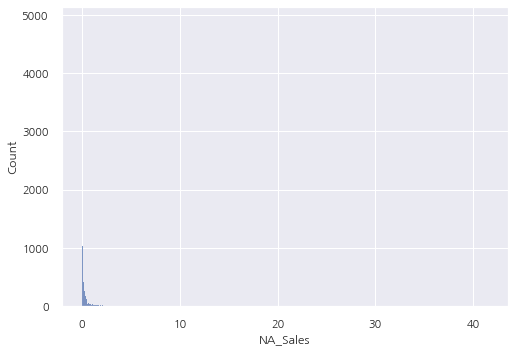

In [ ]:
sns.histplot(vg.NA_Sales)

In [ ]:
vg['NA_Sales'].sort_values(ascending=False)

2908     41.49
4199     29.08
10488    26.93
1203     23.20
12579    15.85
         ...  
8611      0.00
8606      0.00
8604      0.00
8603      0.00
16597     0.00
Name: NA_Sales, Length: 16141, dtype: float64

In [ ]:
vg=vg.query('NA_Sales<20 & EU_Sales<20 & JP_Sales < 20 & Other_Sales<20')

In [ ]:
vg.describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,sum
count,16137.000000,16137.000000,16137.000000,16137.000000,16137.000000
mean,0.257742,0.145156,0.077036,0.047599,0.527533
std,0.665865,0.453792,0.299018,0.177875,1.349753
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.060000
50%,0.080000,0.020000,0.000000,0.010000,0.170000
75%,0.240000,0.110000,0.040000,0.040000,0.480000
max,15.850000,12.880000,10.220000,10.570000,35.830000


In [ ]:
sum_genre=vg.groupby(['Genre']).sum().sort_values(by = "NA_Sales", ascending=False).reset_index()

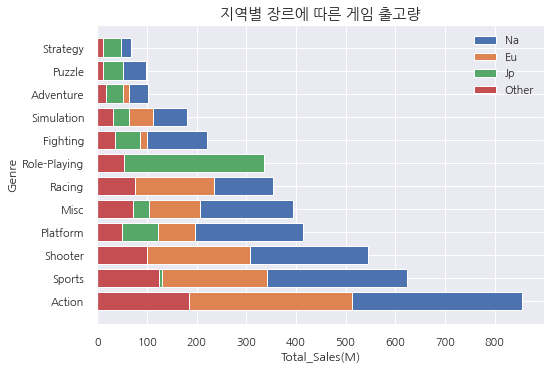

In [ ]:
x = sum_genre.columns
y = sum_genre.index

p1 = plt.barh(sum_genre.Genre, sum_genre.NA_Sales, label="Na")
p2 = plt.barh(sum_genre.Genre, sum_genre.EU_Sales, label="Eu")
p3 = plt.barh(sum_genre.Genre, sum_genre.JP_Sales, label="Jp")
p4 = plt.barh(sum_genre.Genre, sum_genre.Other_Sales, label="Other")
plt.title('지역별 장르에 따른 게임 출고량', fontsize=15)
plt.xlabel('Total_Sales(M)')
plt.ylabel('Genre')
plt.legend([p1,p2,p3,p4],('Na','Eu','Jp',"Other"))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

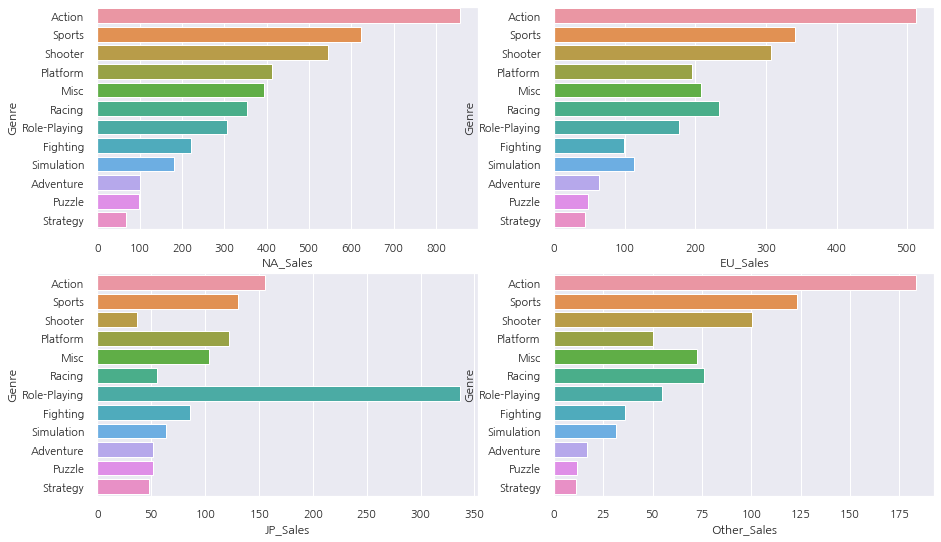

In [ ]:
fig, ax = plt.subplots(2,2, figsize = (15,9))

sns.barplot(sum_genre.NA_Sales,sum_genre.Genre,   ax=ax[0,0])
sns.barplot(sum_genre.EU_Sales, sum_genre.Genre,  ax=ax[0,1])
sns.barplot(sum_genre.JP_Sales,sum_genre.Genre,   ax=ax[1,0])
sns.barplot(sum_genre.Other_Sales,sum_genre.Genre,   ax=ax[1,1])

# plt.xlim(0,1100)
plt.show()

In [ ]:
vg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16137 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16137 non-null  object 
 1   Platform     16137 non-null  object 
 2   Year         16137 non-null  object 
 3   Genre        16137 non-null  object 
 4   Publisher    16137 non-null  object 
 5   NA_Sales     16137 non-null  float64
 6   EU_Sales     16137 non-null  float64
 7   JP_Sales     16137 non-null  float64
 8   Other_Sales  16137 non-null  float64
 9   sum          16137 non-null  float64
dtypes: float64(5), object(5)
memory usage: 1.4+ MB


In [ ]:
na_p = pd.DataFrame(vg[['NA_Sales','Platform']].query('NA_Sales>0').groupby('Platform').sum()).nlargest(10, "NA_Sales", keep='first')
jp_p = pd.DataFrame(vg[['JP_Sales','Platform']].query('JP_Sales>0').groupby('Platform').sum()).nlargest(10, "JP_Sales", keep='first')

eu_p = pd.DataFrame(vg[['EU_Sales','Platform']].query('EU_Sales>0').groupby('Platform').sum()).nlargest(10, "EU_Sales", keep='first')
other_p = pd.DataFrame(vg[['Other_Sales','Platform']].query('Other_Sales>0').groupby('Platform').sum()).nlargest(10, "Other_Sales", keep='first')



In [ ]:
total_p = pd.DataFrame(vg[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Platform']].query('NA_Sales>0|JP_Sales>0|EU_Sales>0|Other_Sales>0').groupby('Platform').sum()).nlargest(10, "NA_Sales", keep='first')


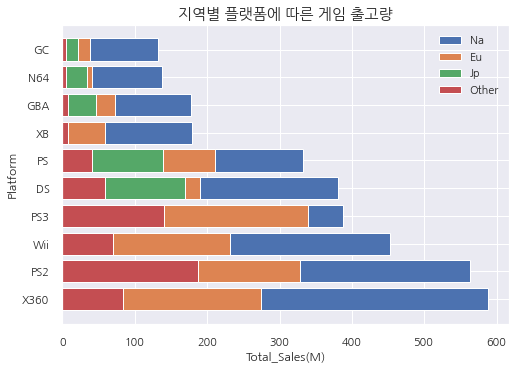

In [ ]:
p1 = plt.barh(total_p.index, total_p.NA_Sales, label="Na")
p2 = plt.barh(total_p.index, total_p.EU_Sales, label="Eu")
p3 = plt.barh(total_p.index, total_p.JP_Sales, label="Jp")
p4 = plt.barh(total_p.index, total_p.Other_Sales, label="Other")
plt.title('지역별 플랫폼에 따른 게임 출고량', fontsize=15)
plt.xlabel('Total_Sales(M)')
plt.ylabel('Platform')
plt.legend([p1,p2,p3,p4],('Na','Eu','Jp',"Other"))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

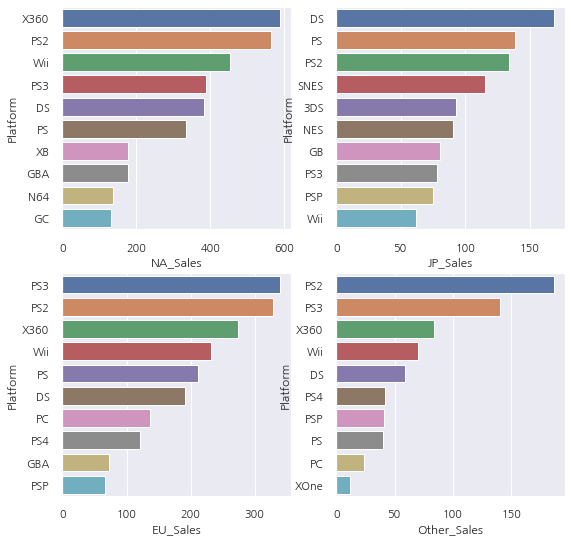

In [ ]:
fig, ax = plt.subplots(2,2, figsize = (9,9))
label=vg.Platform
sns.barplot(na_p.NA_Sales, na_p.index, ax=ax[0,0])
sns.barplot(jp_p.JP_Sales, jp_p.index, ax=ax[0,1])
sns.barplot(eu_p.EU_Sales, eu_p.index,  ax=ax[1,0])
sns.barplot(other_p.Other_Sales, other_p.index, ax=ax[1,1])
# plt.legend(label)
plt.show()

In [ ]:
yg = vg.groupby(['Year','Genre']).count()['Name'].reset_index()
yg = yg.query('2015>Year>2000')
yg.sort_values(by=['Year','Name'],ascending=[False,False])
yg[yg['Year']==2014].sort_values(by='Name',ascending=False)

,Year,Genre,Name
350,2014,Action,186
357,2014,Role-Playing,90
351,2014,Adventure,75
360,2014,Sports,54
358,2014,Shooter,47
353,2014,Misc,41
356,2014,Racing,27
352,2014,Fighting,22
359,2014,Simulation,11
354,2014,Platform,10


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


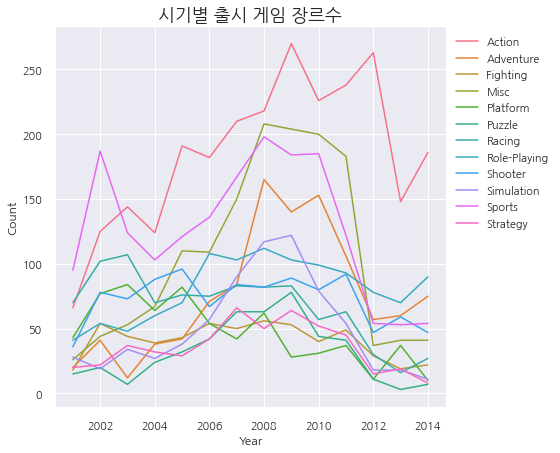

In [ ]:

fig, ax = plt.subplots(1,1, figsize = (7,7))
sns.lineplot(yg.Year,yg.Name, hue = yg.Genre)
ax.set(xlabel = 'Year', ylabel = 'Count')
plt.legend(loc = 2, bbox_to_anchor = (1,1))
plt.title('시기별 출시 게임 장르수', fontsize=18)

plt.show()

In [ ]:
# yg2 = vg.groupby(['Year','Genre']).sum().reset_index()
# yg2 = yg2.query('2000>Year>1995')
# yg2 = yg2[['Year','Genre', 'sum']]
# yg2.head(10)
# yg2.info()

yg2 = vg.groupby(['Year','Genre']).sum().reset_index()
yg2['sum'].astype(float)
yg2 = yg2.query('2015>Year>2000')
yg2.head(10)
# yg2.sort_values(by=['Year','sum'],ascending=[False,False])
yg2[yg2['Year']==2014].sort_values(by='sum',ascending=False)


,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,sum
350,2014,Action,38.73,40.48,6.50,13.30,99.01
358,2014,Shooter,30.72,25.81,1.08,8.38,65.99
357,2014,Role-Playing,13.56,11.23,17.71,3.38,45.88
360,2014,Sports,18.36,18.16,1.59,6.15,44.26
353,2014,Misc,9.43,8.87,2.36,3.07,23.73
356,2014,Racing,5.86,7.70,1.46,1.69,16.71
352,2014,Fighting,6.89,3.07,4.42,1.39,15.77
354,2014,Platform,3.02,3.63,1.26,0.96,8.87
351,2014,Adventure,1.94,2.11,1.36,0.68,6.09
359,2014,Simulation,1.22,3.44,0.37,0.51,5.54


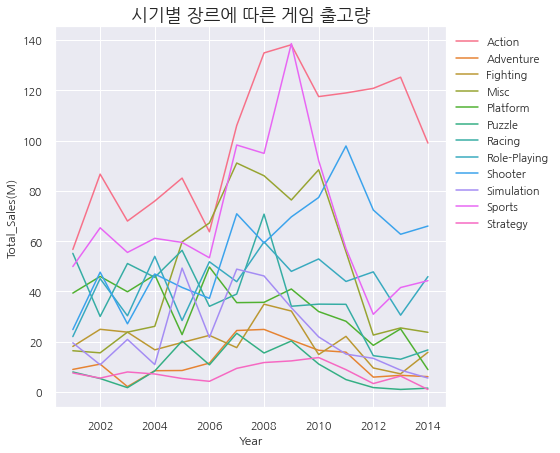

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (7,7))
sns.lineplot(x=yg2.Year, y=yg2.NA_Sales+yg2.EU_Sales+yg2.JP_Sales+yg2.Other_Sales, hue = yg2.Genre)
ax.set(xlabel = 'Year', ylabel = 'Total_Sales(M)')
plt.legend(loc = 2, bbox_to_anchor = (1,1))
plt.title('시기별 장르에 따른 게임 출고량', fontsize=18)

plt.show()

In [ ]:
yg4 = vg.groupby(['Year','Genre']).count().reset_index()
yg5 = vg.groupby(['Year','Genre']).sum().reset_index()
yg5['sum'] = yg5.NA_Sales + yg5.EU_Sales + yg5.JP_Sales + yg5.Other_Sales

In [ ]:
yg5

,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,sum
0,1980,Action,0.32,0.02,0.00,0.00,0.34
1,1980,Fighting,0.72,0.04,0.00,0.01,0.77
2,1980,Misc,2.53,0.15,0.00,0.02,2.70
3,1980,Shooter,6.56,0.43,0.00,0.08,7.07
4,1981,Action,13.86,0.81,0.00,0.12,14.79
...,...,...,...,...,...,...,...
383,2016,Sports,4.57,7.36,0.61,1.92,14.46
384,2016,Strategy,0.11,0.32,0.05,0.04,0.52
385,2017,Action,0.00,0.00,0.01,0.00,0.01
386,2017,Role-Playing,0.00,0.00,0.04,0.00,0.04


In [ ]:
yg6 = pd.concat([yg4['Name'],yg5],axis=1).reset_index()
yg6.Name=yg6.Name.astype(float)
yg6=yg6.rename(columns={"Name":"Count"})
yg6=yg6.drop("index",axis=1)
yg6.sort_values(by=["sum","Count"], ascending=[False,False])
yg6=yg6.query("Count>10 & Year>1995")
yg6

,Count,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,sum
134,20.0,1996,Action,10.65,5.88,2.62,1.45,20.60
135,16.0,1996,Adventure,0.40,0.29,2.60,0.07,3.36
136,30.0,1996,Fighting,7.12,4.05,6.12,0.75,18.04
137,23.0,1996,Misc,4.08,2.75,3.47,0.36,10.66
138,14.0,1996,Platform,13.81,6.83,6.76,0.83,28.23
...,...,...,...,...,...,...,...,...
377,17.0,2016,Misc,0.22,0.09,0.75,0.03,1.09
379,19.0,2016,Racing,0.33,1.10,0.01,0.18,1.62
380,40.0,2016,Role-Playing,1.39,1.29,3.63,0.44,6.75
381,31.0,2016,Shooter,6.14,5.63,0.43,1.77,13.97


In [ ]:
yg7 = vg.groupby('Publisher').sum()
yg7.info()
yg7['jp/total'] = yg7['JP_Sales'] / yg7['sum'] *100
yg7=yg7.reset_index()
yg7=yg7.sort_values(by=['sum','jp/total'],ascending=[False,False]).head(15)


<class 'pandas.core.frame.DataFrame'>
Index: 573 entries, 10TACLE Studios to responDESIGN
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   NA_Sales     573 non-null    float64
 1   EU_Sales     573 non-null    float64
 2   JP_Sales     573 non-null    float64
 3   Other_Sales  573 non-null    float64
 4   sum          573 non-null    float64
dtypes: float64(5)
memory usage: 26.9+ KB


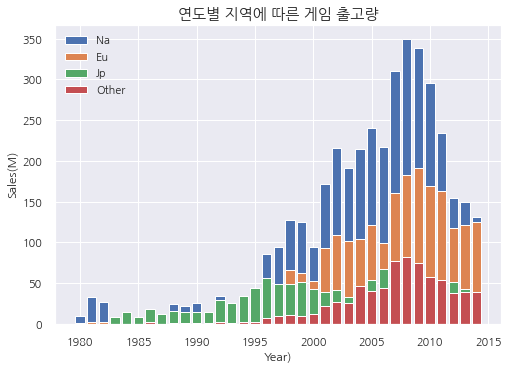

In [ ]:
svg = vg.groupby('Year').sum()
svg=svg.query('Year<2015')

p1 = plt.bar(svg.index, svg.NA_Sales, label="Na")
p2 = plt.bar(svg.index, svg.EU_Sales, label="Eu")
p3 = plt.bar(svg.index, svg.JP_Sales, label="Jp")
p4 = plt.bar(svg.index, svg.Other_Sales, label="Other")
plt.title('연도별 지역에 따른 게임 출고량', fontsize=15)
plt.xlabel('Year)')
plt.ylabel('Sales(M)')
plt.legend([p1,p2,p3,p4],('Na','Eu','Jp',"Other"))
plt.show()

In [ ]:
vg.head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,sum
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
5,Power Pro Kun Pocket 8,DS,2005,Sports,Konami Digital Entertainment,0.00,0.00,0.14,0.00,0.14
6,JASF: Jane's Advanced Strike Fighters,PC,2011,Simulation,Deep Silver,0.02,0.01,0.00,0.00,0.03
7,Samurai Warriors: State of War,PSP,2005,Action,Tecmo Koei,0.07,0.00,0.11,0.01,0.19
8,Imabikisou,PS3,2007,Adventure,Sega,0.00,0.00,0.04,0.00,0.04
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011,Action,THQ,0.04,0.03,0.00,0.01,0.08


In [177]:
vgs = vg[vg['sum']>10]
vgs = vgs[['Publisher','Platform','Genre','sum']]
len(vgs)

56

In [ ]:
!pip install scikit-learn
!pip install sklearn.preprocessing
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement sklearn.preprocessing (from versions: none)
ERROR: No matching distribution found for sklearn.preprocessing


In [178]:
data = vgs['Platform']
values = array(data)

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)

onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

vgs = pd.get_dummies(data = vgs, columns = ['Platform'], prefix = 'Platform')

In [179]:
data = vgs['Genre']
values = array(data)
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

vgs = pd.get_dummies(data = vgs, columns = ['Genre'], prefix = 'Genre')

[ 3  5  6  7  0  8  4  3  9 10 10  0  8  7  3  0  6  0  8  6  8  8  8  8
  4  1  4  7  8  7  8  7  4  0  8  7  6 10  0  7  6  9  4  4  6  4  4  3
  0  8  6  0  4  2  0  4]


In [180]:
data = vgs['Publisher'] 
values = array(data)
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

vgs = pd.get_dummies(data = vgs, columns = ['Publisher'], prefix = 'Publisher')

[5 2 3 2 4 0 2 2 2 2 2 4 0 2 1 2 3 4 0 3 0 0 1 0 2 2 2 2 0 2 0 2 2 4 0 2 2
 2 4 2 2 2 2 2 2 2 2 2 4 0 3 4 2 2 4 2]


In [181]:
new_df = pd.DataFrame.to_numpy(df)
df.columns
from numpy import array   
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
Z = scaler.fit_transform(new_df)
pca = PCA(5) 
pca.fit(Z)

PCA(n_components=5)

In [182]:
principalComponents = pca.fit_transform(Z)
principalDf = pd.DataFrame(data=principalComponents,columns=['PC1','PC2','PC3','PC4','PC5'])

print("\n Eigenvalues: \n", pca.explained_variance_)
print("\n Explained variance ratio: \n", sum(pca.explained_variance_ratio_))


 Eigenvalues: 
 [2.49294006 2.09327637 1.88777204 1.83716946 1.73576061]

 Explained variance ratio: 
 0.39470037127680746


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


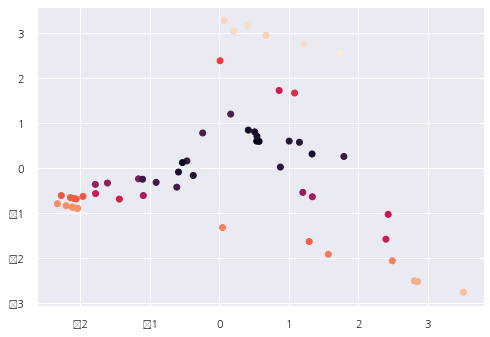

In [183]:
plt.scatter(x=principalDf['PC1'],y=principalDf['PC2'],c=principalDf['PC3'])

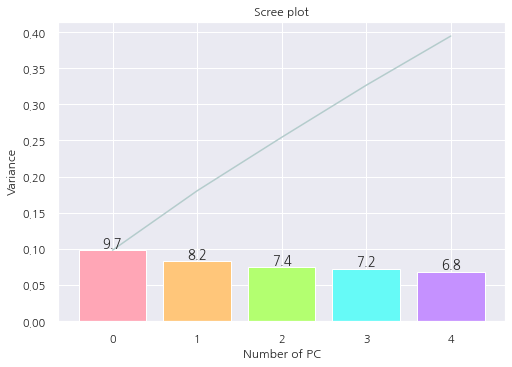

In [184]:
def scree_plot(pca):
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
    
    ax = plt.subplot()
    cumvals = np.cumsum(vals)
    ax.plot(ind, cumvals, color = '#b4cccc')
    ax.bar(ind, vals, color = ['#ffa6b6', '#ffc67a',  '#b3ff70', '#66faf7', '#c591ff'])
    for i in range(num_components):
        ax.annotate(r"%s" % ((str(vals[i]*100)[:3])), (ind[i], vals[i]), va = "bottom", ha = "center", fontsize = 13)
     
    ax.set_xlabel("Number of PC")
    ax.set_ylabel("Variance")
    plt.title('Scree plot')
    
scree_plot(pca)